In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
from pysfa import SFA

## Import data

In [2]:
df = pd.read_csv('../data/msfa_data.csv')

## Create object

In [3]:
m = df.shape[0]
s = np.sqrt(df['uhc_variance'].values)
#
x_physicians = np.vstack((np.ones(m), np.log(0.1+df['physicians'].values))).T
x_nurses = np.vstack((np.ones(m), np.log(0.1+df['nurses'].values))).T
#
z = np.ones((m,1))
d = np.ones((m,1))
y = df['uhc'].values
#
sfa_physicians = SFA(x_physicians, z, d, s, Y=y)
sfa_nurses = SFA(x_nurses, z, d, s, Y=y)

number of studies:      5460
number of measurements: 5460
dimension of beta:      2
dimension of gama:      1
dimension of deta:      1
cond number of X cov:   4.60122939299
cond number of Z cov:   1.0
cond number of D cov:   1.0
number of studies:      5460
number of measurements: 5460
dimension of beta:      2
dimension of gama:      1
dimension of deta:      1
cond number of X cov:   11.0690482042
cond number of Z cov:   1.0
cond number of D cov:   1.0


## Fit data

In [4]:
sfa_physicians.optimizeSFAWithTrimming(m - 10)

trim 0.002 of the data


../src/pysfa.py:341: RuntimeWarning: invalid value encountered in sqrt
  su = sqrt(vu)
../src/pysfa.py:342: RuntimeWarning: invalid value encountered in sqrt
  sv = sqrt(vv)


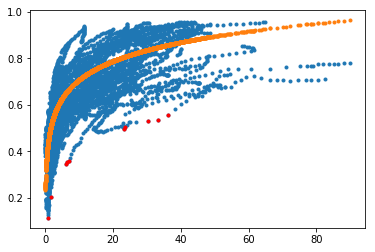

In [5]:
id_outliers = np.where(sfa_physicians.w == 0.0)[0]
plt.plot(df['physicians'].values, y, '.')
plt.plot(df['physicians'].values[id_outliers], y[id_outliers], 'r.')
plt.plot(df['physicians'].values, x_physicians.dot(sfa_physicians.beta_soln), '.')

In [6]:
np.sqrt(sfa_physicians.deta_soln)

array([ 0.04323216])

In [7]:
sfa_nurses.optimizeSFA()

../src/pysfa.py:342: RuntimeWarning: invalid value encountered in sqrt
  sv = sqrt(vv)


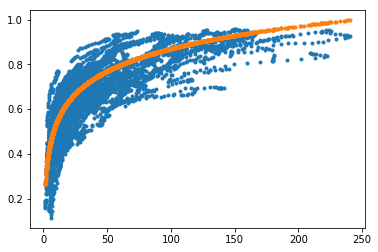

In [8]:
plt.plot(df['nurses'].values, sfa_nurses.Y, '.')
plt.plot(df['nurses'].values, x_nurses.dot(sfa_nurses.beta_soln), '.')

In [9]:
np.sqrt(sfa_nurses.deta_soln)

array([ 0.0457152])